In [1]:
target = "3ai8"

In [2]:
import pandas as pd
pre = pd.read_csv(f"data/{target}/preprocessing.csv", index_col=0)
dim_red = pd.read_csv(f"data/{target}/dim_red.csv", index_col=0)
tuning = pd.read_csv(f"data/{target}/tuning.csv", index_col=0)

In [3]:
ref = pre[(pre.out_threshold == 0) & (pre.resampling == "none") & (pre.scaling == "none")]
ref_train_acc = ref.acc_train.iloc[0]
ref_test_acc = ref.acc_test.iloc[0]

In [4]:
best_pre = pre.sort_values("acc_test", ascending=False).iloc[0]
out = best_pre.out_threshold
rsmp = best_pre.resampling
scl = best_pre.scaling
pre_train_acc = best_pre.acc_train
pre_test_acc = best_pre.acc_test

In [5]:
best_red = dim_red.sort_values("Test accuracy", ascending=False).iloc[0]
dim = best_red.method
red_train_acc = best_red["Train accuracy"]
red_test_acc = best_red["Test accuracy"]

In [6]:
best_tun = tuning.sort_values("test_acc", ascending=False).iloc[0]
tun = best_tun.halving
tun_train_acc = best_tun.train_acc 
tun_test_acc = best_tun.test_acc

In [7]:
train = [ref_train_acc, pre_train_acc, red_train_acc, tun_train_acc]
test = [ref_test_acc, pre_test_acc, red_test_acc, tun_test_acc]
df = pd.DataFrame([train, test], columns=["reference", "preprocessing", "reduction", "tuning"])
df["set"] = ["Train", "Test"]
df = df.set_index("set")
df = df.transpose()
df = df.reset_index()
df.columns = ["stage", "train", "test"]
df

,stage,train,test
0,reference,0.895683,0.712230
1,preprocessing,0.960432,0.841727
2,reduction,0.960432,0.834532
3,tuning,0.976584,0.841727


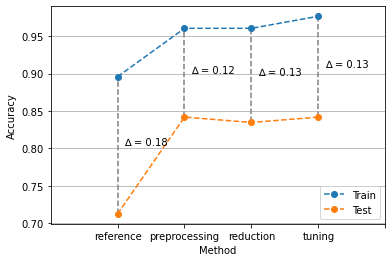

In [8]:
import matplotlib.pyplot as plt
ax = df.plot(
    x="stage", 
    marker="o", 
    linestyle="--", 
    xlim=(-1, 4), 
    xticks=[0, 1, 2, 3, 4, 5], 
    xlabel="Method", 
    ylabel="Accuracy"
)
ax.legend(["Train", "Test"], loc="lower right")
ax.grid(axis="y")
for i, met in enumerate(["reference", "preprocessing", "reduction", "tuning"]):
    test = df[df["stage"] == met]["test"]
    train = df[df["stage"] == met]["train"]
    diff = float(train-test)
    ax.vlines(x=i, ymin=test, ymax=train, color="gray", linestyle="--")
    ax.text(x=i+0.1, y=test + diff/2, s=f"∆ = {diff:.2f}")
plt.savefig(f"data/{target}/stages.png")

In [9]:
with open(f"data/{target}/stages_params.txt", "w") as f:
    f.write(f"out = {out}\nrsmp = {rsmp}\nscl = {scl}\ndim = {dim}\ntun = {tun}")